In [ ]:
import tweepy
import matplotlib.pyplot as plt
from  textblob import TextBlob 
import pandas as pd
import numpy as np
import time

In [ ]:
#@title Secret Consumer and Access Keys From my Twitter Devoloper Profile
consumer_key = "8AO6OU5ubyi4XO47b1C7Sjdlz"
consumer_sec = "FS1usPrfPolvjLXbwGka5N8TWkOZhUsdxGmmTwuO016koesUSt"

# from proxy server we need to connect
access_token = "1151573806680592384-OUFeUtpsRFZM6jQxl1AG99NEjlY0Kt"
access_token_sec = "KKHmkHkDGVaDof8XK4fKKI52DmNl4vZlaXnx85WRfd4Lr"

Connecting to jump server of Twitter.


In [ ]:
auth=tweepy.OAuthHandler(consumer_key,consumer_sec)

Connecting from jump server to web server of Twitter.

In [ ]:
auth.set_access_token(access_token,access_token_sec)

Now we can access the API storage server of Twitter

In [ ]:
api=tweepy.API(auth)

In [ ]:
nooftweets = 1000
tweets = []
likes = []
time = []
for i in tweepy.Cursor(api.user_timeline, id="TOIIndiaNews", tweet_mode="extended").items(nooftweets):
  tweets.append(i.full_text)
  likes.append(i.favorite_count)
  time.append(i.created_at)

In [ ]:
tweets[1:20]

["Isro working on tech that can beat even Star Trek's https://t.co/WSxHDtgDKN",
 "Covid-19: 'Delta' can infect even fully vaccinated, says study https://t.co/DEtwsei4Vy",
 'Delhi pollution gets second wind after some relief https://t.co/nBC0lQ7Pk6',
 'Panel on data protection bats for individual privacy https://t.co/kisPUBbWnq',
 'Noida Airport to bring up to Rs 35,000 cr in investment, one lakh jobs: Adityanath https://t.co/mtpYaA8s90',
 "Continued farmers' stir beyond comprehension: V K Singh https://t.co/1yia2JvRw9",
 'Bill seeking ban on private cryptocurrencies among 26 proposed laws listed by govt for winter session https://t.co/482Vv0ulxc',
 'Indian naval ship undertaking coordinated patrol with Indonesian vessel https://t.co/SqevZuhC2f',
 "SKM to observe 'Kisan Mazdoor Sangharsh Diwas' on November 24 https://t.co/ZzdZv26Uk5",
 'Mamata continues with TMC expansion plans; Haryana, Delhi units next month https://t.co/lfbVxDCai3',
 "Oral sex with minor not 'aggravated sexual assaul

In [ ]:
df = pd.DataFrame({'tweets':tweets,'likes':likes,'time':time})

In [ ]:
df

,tweets,likes,time
0,"Noida Airport to bring up to Rs 35,000 cr in i...",32,2021-11-23 18:20:01
1,Continued farmers' stir beyond comprehension: ...,7,2021-11-23 18:05:31
2,Bill seeking ban on private cryptocurrencies a...,19,2021-11-23 18:05:01
3,Indian naval ship undertaking coordinated patr...,19,2021-11-23 17:35:32
4,SKM to observe 'Kisan Mazdoor Sangharsh Diwas'...,9,2021-11-23 17:35:01
...,...,...,...
995,Channi govt to give Rs 2 lakh to 83 arrested i...,160,2021-11-12 17:11:14
996,Anil Deshmukh submits handwritten application ...,9,2021-11-12 17:10:44
997,PM Modi to land on Purvanchal Expressway in IA...,31,2021-11-12 17:10:13
998,JD(U) girds up its loins to contest 20 assembl...,12,2021-11-12 16:40:44


In [ ]:
#df = df[~df.tweets.str.contains("RT")]
#df = df[~df.tweets.str.contains("@mygovindia")]


In [ ]:
df

,tweets,likes,time
0,"Noida Airport to bring up to Rs 35,000 cr in i...",32,2021-11-23 18:20:01
1,Continued farmers' stir beyond comprehension: ...,7,2021-11-23 18:05:31
2,Bill seeking ban on private cryptocurrencies a...,19,2021-11-23 18:05:01
3,Indian naval ship undertaking coordinated patr...,19,2021-11-23 17:35:32
4,SKM to observe 'Kisan Mazdoor Sangharsh Diwas'...,9,2021-11-23 17:35:01
...,...,...,...
995,Channi govt to give Rs 2 lakh to 83 arrested i...,160,2021-11-12 17:11:14
996,Anil Deshmukh submits handwritten application ...,9,2021-11-12 17:10:44
997,PM Modi to land on Purvanchal Expressway in IA...,31,2021-11-12 17:10:13
998,JD(U) girds up its loins to contest 20 assembl...,12,2021-11-12 16:40:44


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import re  
import spacy
nlp = spacy.load('en_core_web_sm')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df['length'] = df['tweets'].apply(len)
df.head()

,tweets,likes,time,length
0,"Noida Airport to bring up to Rs 35,000 cr in i...",32,2021-11-23 18:20:01,106
1,Continued farmers' stir beyond comprehension: ...,7,2021-11-23 18:05:31,79
2,Bill seeking ban on private cryptocurrencies a...,19,2021-11-23 18:05:01,125
3,Indian naval ship undertaking coordinated patr...,19,2021-11-23 17:35:32,95
4,SKM to observe 'Kisan Mazdoor Sangharsh Diwas'...,9,2021-11-23 17:35:01,85


In [ ]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [ ]:
data=df

In [ ]:
data

,tweets,likes,time,length
0,"Noida Airport to bring up to Rs 35,000 cr in i...",32,2021-11-23 18:20:01,106
1,Continued farmers' stir beyond comprehension: ...,7,2021-11-23 18:05:31,79
2,Bill seeking ban on private cryptocurrencies a...,19,2021-11-23 18:05:01,125
3,Indian naval ship undertaking coordinated patr...,19,2021-11-23 17:35:32,95
4,SKM to observe 'Kisan Mazdoor Sangharsh Diwas'...,9,2021-11-23 17:35:01,85
...,...,...,...,...
995,Channi govt to give Rs 2 lakh to 83 arrested i...,160,2021-11-12 17:11:14,111
996,Anil Deshmukh submits handwritten application ...,9,2021-11-12 17:10:44,101
997,PM Modi to land on Purvanchal Expressway in IA...,31,2021-11-12 17:10:13,92
998,JD(U) girds up its loins to contest 20 assembl...,12,2021-11-12 16:40:44,98


In [ ]:
df

,tweets,likes,time,length
0,"Noida Airport to bring up to Rs 35,000 cr in i...",32,2021-11-23 18:20:01,106
1,Continued farmers' stir beyond comprehension: ...,7,2021-11-23 18:05:31,79
2,Bill seeking ban on private cryptocurrencies a...,19,2021-11-23 18:05:01,125
3,Indian naval ship undertaking coordinated patr...,19,2021-11-23 17:35:32,95
4,SKM to observe 'Kisan Mazdoor Sangharsh Diwas'...,9,2021-11-23 17:35:01,85
...,...,...,...,...
995,Channi govt to give Rs 2 lakh to 83 arrested i...,160,2021-11-12 17:11:14,111
996,Anil Deshmukh submits handwritten application ...,9,2021-11-12 17:10:44,101
997,PM Modi to land on Purvanchal Expressway in IA...,31,2021-11-12 17:10:13,92
998,JD(U) girds up its loins to contest 20 assembl...,12,2021-11-12 16:40:44,98


In [ ]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
df['tweets'] = df['tweets'].apply(lambda text: cleaning_stopwords(text))
df['tweets'].head()

0    Noida Airport bring Rs 35,000 cr investment, o...
1    Continued farmers' stir beyond comprehension: ...
2    Bill seeking ban private cryptocurrencies amon...
3    Indian naval ship undertaking coordinated patr...
4    SKM observe 'Kisan Mazdoor Sangharsh Diwas' No...
Name: tweets, dtype: object

In [ ]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
df['tweets'] = df['tweets'].apply(lambda x: cleaning_repeating_char(x))
df['tweets'].tail()

995    Channi govt give Rs 2 lakh 83 arrested Delhi t...
996    Anil Deshmukh submits handwritten application ...
997    PM Modi land Purvanchal Expressway IAF plane N...
998    JD(U) girds loins contest 20 assembly seats BJ...
999    Amit Shah exhorts party cadres improve BJP tal...
Name: tweets, dtype: object

In [ ]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
df['tweets'] = df['tweets'].apply(lambda x: cleaning_URLs(x))
df['tweets'].tail()


995    Channi govt give Rs 2 lakh 83 arrested Delhi t...
996    Anil Deshmukh submits handwritten application ...
997    PM Modi land Purvanchal Expressway IAF plane N...
998    JD(U) girds loins contest 20 assembly seats BJ...
999    Amit Shah exhorts party cadres improve BJP tal...
Name: tweets, dtype: object

In [ ]:
df["tweets"]

0      Noida Airport bring Rs 35,000 cr investment, o...
1      Continued farmers' stir beyond comprehension: ...
2      Bill seeking ban private cryptocurrencies amon...
3      Indian naval ship undertaking coordinated patr...
4      SKM observe 'Kisan Mazdoor Sangharsh Diwas' No...
                             ...                        
995    Channi govt give Rs 2 lakh 83 arrested Delhi t...
996    Anil Deshmukh submits handwritten application ...
997    PM Modi land Purvanchal Expressway IAF plane N...
998    JD(U) girds loins contest 20 assembly seats BJ...
999    Amit Shah exhorts party cadres improve BJP tal...
Name: tweets, Length: 1000, dtype: object

In [ ]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
df['tweets'] = df['tweets'].apply(tokenizer.tokenize)
df['tweets'].head()

0    [Noida, Airport, bring, Rs, 35, 000, cr, inves...
1    [Continued, farmers, stir, beyond, comprehensi...
2    [Bill, seeking, ban, private, cryptocurrencies...
3    [Indian, naval, ship, undertaking, coordinated...
4    [SKM, observe, Kisan, Mazdoor, Sangharsh, Diwa...
Name: tweets, dtype: object

In [ ]:
import nltk 
st = nltk.PorterStemmer() 
def stemming_on_text(data): 
  text = [st.stem(word) for word in data] 
  return data 
df['tweets']= df['tweets'].apply(lambda x: stemming_on_text(x)) 
df['tweets'].head()

0    [Noida, Airport, bring, Rs, 35, 000, cr, inves...
1    [Continued, farmers, stir, beyond, comprehensi...
2    [Bill, seeking, ban, private, cryptocurrencies...
3    [Indian, naval, ship, undertaking, coordinated...
4    [SKM, observe, Kisan, Mazdoor, Sangharsh, Diwa...
Name: tweets, dtype: object

In [ ]:
import string

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(df["tweets"])
print(len(bow_transformer.vocabulary_))

996


In [ ]:
print(df["tweets"])

0      [Noida, Airport, bring, Rs, 35, 000, cr, inves...
1      [Continued, farmers, stir, beyond, comprehensi...
2      [Bill, seeking, ban, private, cryptocurrencies...
3      [Indian, naval, ship, undertaking, coordinated...
4      [SKM, observe, Kisan, Mazdoor, Sangharsh, Diwa...
                             ...                        
995    [Channi, govt, give, Rs, 2, lakh, 83, arrested...
996    [Anil, Deshmukh, submits, handwritten, applica...
997    [PM, Modi, land, Purvanchal, Expressway, IAF, ...
998    [JD, U, girds, loins, contest, 20, assembly, s...
999    [Amit, Shah, exhorts, party, cadres, improve, ...
Name: tweets, Length: 1000, dtype: object


In [ ]:
messages_bow = bow_transformer.transform(df["tweets"])
print(messages_bow)

  (0, 608)	1
  (1, 212)	1
  (2, 133)	1
  (3, 436)	1
  (4, 809)	1
  (5, 534)	1
  (6, 627)	1
  (7, 489)	1
  (8, 562)	1
  (9, 927)	1
  (10, 637)	1
  (11, 842)	1
  (12, 888)	1
  (13, 425)	1
  (14, 43)	1
  (15, 530)	1
  (16, 307)	1
  (17, 731)	1
  (18, 599)	1
  (19, 259)	1
  (20, 898)	1
  (21, 340)	1
  (22, 332)	1
  (23, 715)	1
  (24, 724)	1
  :	:
  (975, 760)	1
  (976, 900)	1
  (977, 143)	1
  (978, 859)	1
  (979, 728)	1
  (980, 518)	1
  (981, 53)	1
  (982, 186)	1
  (983, 675)	1
  (984, 580)	1
  (985, 886)	1
  (986, 896)	1
  (987, 63)	1
  (988, 55)	1
  (989, 327)	1
  (990, 500)	1
  (991, 331)	1
  (992, 918)	1
  (993, 815)	1
  (994, 462)	1
  (995, 181)	1
  (996, 70)	1
  (997, 674)	1
  (998, 478)	1
  (999, 61)	1


In [ ]:
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (1000, 996)
Amount of Non-Zero occurences:  1000


In [ ]:
!pip install vaderSentiment
!pip install twython

     |████████████████████████████████| 125 kB 7.8 MB/s 


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()
scores=[]
for i in range(len(df["tweets"])):
  score = analyser.polarity_scores(df["tweets"][i])
  score=score['compound']
  scores.append(score)
sentiment=[]
for i in scores:
    if i>=0.05:
        sentiment.append('Positive')
    elif i<=(-0.05):
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')
data['sentiment']=pd.Series(np.array(sentiment))

In [ ]:
data

,tweets,likes,time,length,sentiment
0,"Noida Airport bring Rs 35,000 cr investment, o...",32,2021-11-23 18:20:01,106,Neutral
1,Continued farmers' stir beyond comprehension: ...,7,2021-11-23 18:05:31,79,Neutral
2,Bill seeking ban private cryptocurrencies amon...,19,2021-11-23 18:05:01,125,Negative
3,Indian naval ship undertaking coordinated patr...,19,2021-11-23 17:35:32,95,Neutral
4,SKM observe 'Kisan Mazdoor Sangharsh Diwas' No...,9,2021-11-23 17:35:01,85,Neutral
...,...,...,...,...,...
995,Channi govt give Rs 2 lakh 83 arrested Delhi t...,160,2021-11-12 17:11:14,111,Negative
996,Anil Deshmukh submits handwritten application ...,9,2021-11-12 17:10:44,101,Neutral
997,PM Modi land Purvanchal Expressway IAF plane N...,31,2021-11-12 17:10:13,92,Neutral
998,JD(U) girds loins contest 20 assembly seats BJ...,12,2021-11-12 16:40:44,98,Neutral


In [ ]:
temp = df.groupby('sentiment').count()['tweets'].reset_index()
temp

,sentiment,tweets
0,Negative,307
1,Neutral,434
2,Positive,259


In [ ]:
import seaborn as sns

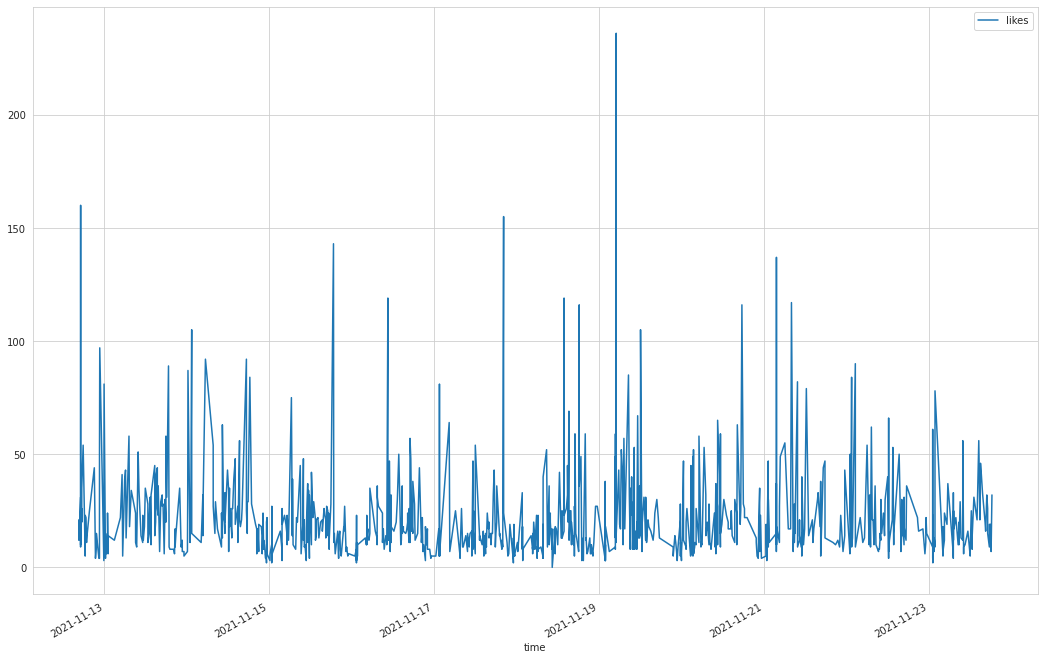

In [ ]:
df.plot( 'time' , 'likes' ,figsize=(18, 12))

We can analyze the trends in likes or other features that we can extract and make time series graphs like this one.
This can be also used for Cryptocurrency and trading analysis problems.

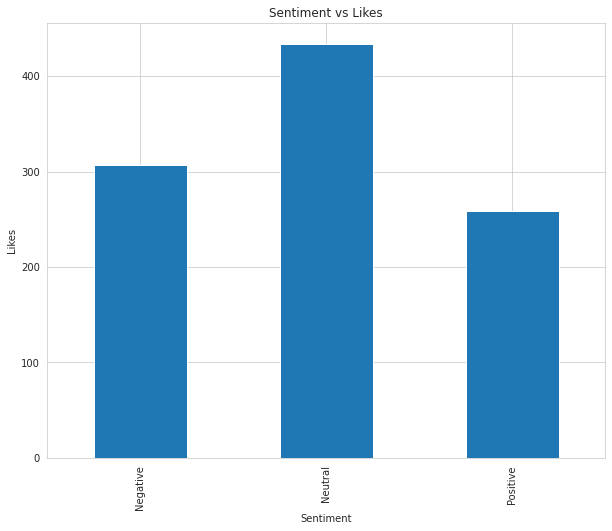

In [ ]:
dfg = df.groupby(['sentiment'])['likes'].count()
dfg.plot(kind='bar', title='Sentiment vs Likes', ylabel='Likes',
         xlabel='Sentiment', figsize=(10, 8))